<a href="https://colab.research.google.com/github/AshvinVignesh/Iris-Deep-Learning-Classification/blob/main/Iris_Deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING KERAS DEEP LEARNING FOR IRIS 

In [ ]:
!pip install tensorflow

In [24]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Read CSV File

In [25]:
iris = pd.read_csv("iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Convert Species to Numeric values 

In [26]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
iris['Species'] = Label_encoder.fit_transform(iris['Species'])

In [27]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
#Convert input to numpy array
np_iris = iris.to_numpy()

In [29]:
#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

Standardizing the feature values 

In [30]:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

Convert target values by using one-hot encoder 

In [31]:
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [32]:
print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [33]:
X_train, X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

Creating a Model

Creating a model in Keras requires defining the following

    

1.   Number of hidden layers
2.   Number of nodes in each layer
3.    Activation functions
4.     Loss Function & Accuracy measurements


In [34]:
from tensorflow import keras

In [37]:
#Number of classes in the target variable
no_of_classes=3

#Create a sequential model 
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

model.add(keras.layers.Dense(128,name='Hidden-Layer-2',activation='relu'))

model.add(keras.layers.Dense(no_of_classes,name='Output-Layer',activation='softmax'))

#compile the model with loss and metrics
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Make it verbose so we can see the progress
VERBOSE=1
#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 27ms/step - loss: 0.9202 - accuracy: 0.6574 - val_loss: 0.6761 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.8241 - val_loss: 0.5139 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.8333 - val_loss: 0.4347 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4073 - accuracy: 0.8426 - val_loss: 0.3852 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.8426 - val_loss: 0.3612 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.8426 - val_loss: 0.3194 - val_accuracy: 0.8519
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3097 - accuracy: 0.8519 - val_loss: 0.2960


Accuracy during Training :
------------------------------------


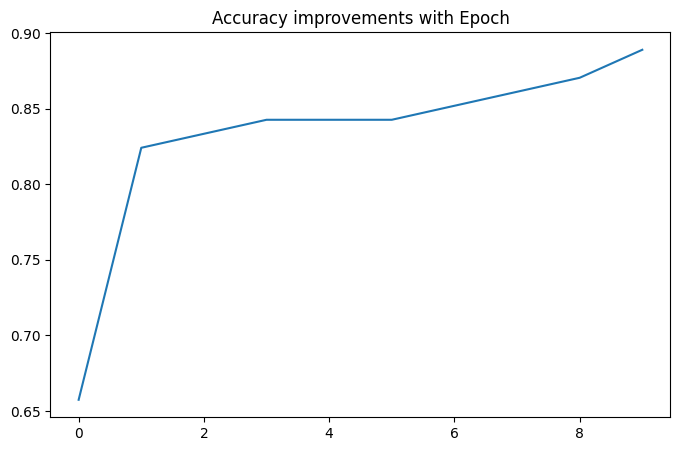

In [40]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [41]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 17ms/step - loss: 0.2485 - accuracy: 0.8667


[0.2484636902809143, 0.8666666746139526]

Saving and Loading Models

In [42]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


Predictions with Deep Learning Models

In [44]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", Label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 45ms/step
Raw Prediction Output (Probabilities) : [[0.02418554 0.5424287  0.43338582]]
Prediction is  ['versicolor']
